# Data Preprocessing for supervised learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import pickle
from os import path

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/My Drive/cmput_644_project/datasets/KDDTrain.txt'

data = pd.read_csv(file_path, header=None, names=col_names)

print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0        

In [ ]:
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(125973, 42)

In [ ]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [ ]:
def refactor_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

refactor_label(data)

In [ ]:
data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

In [ ]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [ ]:
# Pre Processing
### Data Normalization
### One-hot-encoding
def preprocess_data(data):

    target = data['label']
    data = data.drop('label', axis=1)


    numeric_columns = data.select_dtypes(include='number').columns
    scaler = StandardScaler()
    data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

    categorical_columns = data.select_dtypes(exclude='number').columns
    data_categorical = data[categorical_columns]
    data_cat = pd.get_dummies(data_categorical, columns=categorical_columns)

    data_full = pd.concat([data, data_cat], axis=1)

    data_full = data_full.drop(categorical_columns, axis=1)

    data_full['label'] = target

    return data_full, data_cat

In [ ]:
data, categorical = preprocess_data(data)

In [ ]:
data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,1,0,0,0,0,0,Dos
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,1,0,0,0,0,0,Dos
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,1,0,0,0,0,0,Dos


In [ ]:
categorical

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125971,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Data Preprocessing for Binary Classification

In [ ]:
binary_labels = pd.DataFrame(data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [ ]:
bin_data = data.copy()
bin_data['label'] = binary_labels


In [ ]:
bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,1,0,0,0,0,0,abnormal
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,1,0,0,0,0,0,abnormal
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,1,0,0,0,0,0,abnormal


In [ ]:
bin_features_data = bin_data.copy()
bin_label_encoder = LabelEncoder()
bin_features_data['label'] = bin_label_encoder.fit_transform(bin_features_data['label'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


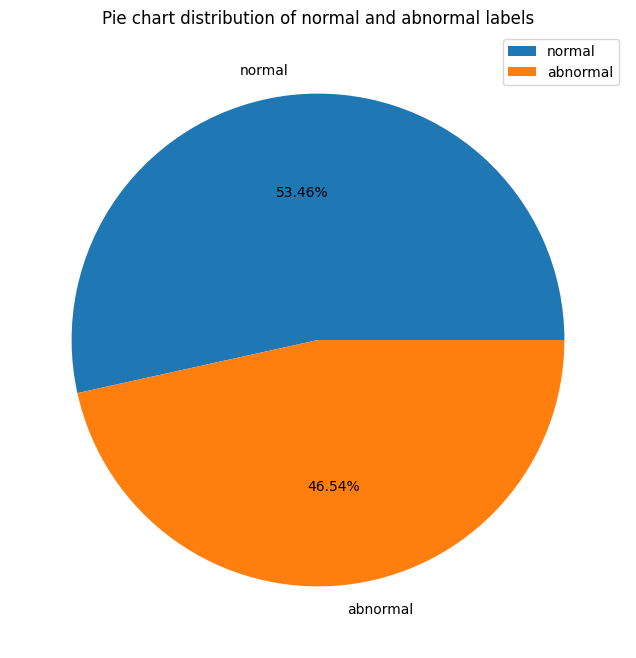

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(), labels=bin_data.label.unique(), autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/Pie_chart_binary.png')

plt.show()

In [ ]:
bin_data.to_csv('/content/drive/My Drive/cmput_644_project/datasets/binary_data_full.csv', index=False)

# Data Preprocessing for Multi Classification

In [ ]:
multi_data = data.copy()

In [ ]:
multi_features_data = multi_data.copy()
multi_label_encoder = LabelEncoder()
multi_features_data['label'] = multi_label_encoder.fit_transform(multi_features_data['label'])

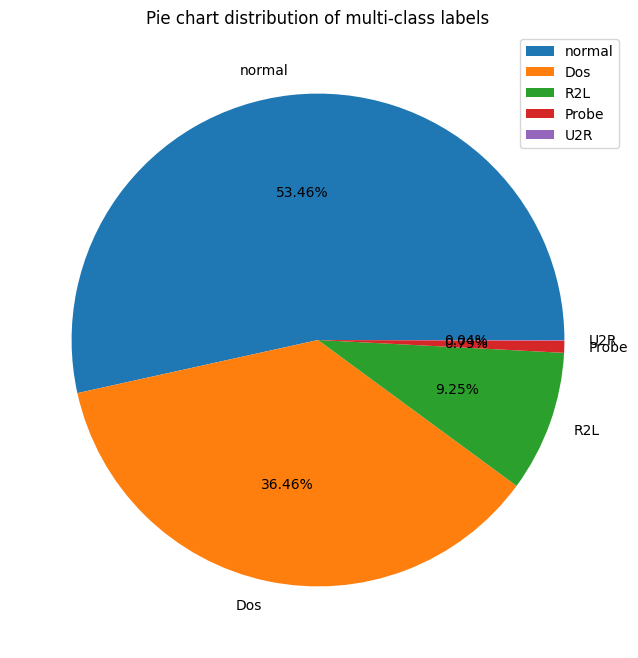

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/Pie_chart_multiclass.png')
plt.show()

In [ ]:
multi_data.to_csv('/content/drive/My Drive/cmput_644_project/datasets/multi_data_full.csv', index=False)

# Feature Extraction

## Binary Class feature extraction

In [ ]:
corr = bin_features_data.corr()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

service_http                0.562312
count                       0.576444
srv_serror_rate             0.648289
flag_S0                     0.650206
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
flag_SF                     0.756286
label                       1.000000
Name: label, dtype: float64

In [ ]:
bin_features_data = bin_features_data[['service_http', 'count', 'srv_serror_rate', 'flag_S0', 'serror_rate',
                                       'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'logged_in', 'dst_host_same_srv_rate',
                                       'dst_host_srv_count', 'same_srv_rate', 'flag_SF']]

bin_features_data = pd.concat([bin_features_data, categorical], axis=1)

In [ ]:
bin_features_data['bin_label'] = bin_data['label']

In [ ]:
bin_features_data.to_csv('/content/drive/My Drive/cmput_644_project/datasets/bin_features_data.csv', index=False)

## Multi Class feature extraction

In [ ]:
corr = multi_features_data.corr()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

service_http                0.549874
count                       0.613251
logged_in                   0.693770
srv_serror_rate             0.710852
serror_rate                 0.712861
dst_host_serror_rate        0.714247
flag_S0                     0.715227
dst_host_same_srv_rate      0.716820
dst_host_srv_serror_rate    0.717387
dst_host_srv_count          0.718579
flag_SF                     0.790319
same_srv_rate               0.798358
label                       1.000000
Name: label, dtype: float64

In [ ]:
multi_features_data = multi_features_data[['service_http', 'count', 'logged_in', 'srv_serror_rate',
                                           'serror_rate', 'dst_host_serror_rate', 'flag_S0',
                                           'dst_host_same_srv_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_count',
                                           'flag_SF', 'same_srv_rate']]

multi_features_data = pd.concat([multi_features_data, categorical], axis=1)

In [ ]:
multi_features_data['multi_label'] = multi_data['label']

In [ ]:
multi_features_data.to_csv('/content/drive/My Drive/cmput_644_project/datasets/multi_features_data.csv', index=False)

--------------------------------------------

In [ ]:
import pickle
from os import path
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from keras.layers import Dense, LSTM, Input
from keras.models import Sequential
from keras.utils import to_categorical
from keras import backend as K
from keras.callbacks import ModelCheckpoint

# Algorithms: Binary Classification (full data)

In [ ]:
bin_data = pd.read_csv('/content/drive/My Drive/cmput_644_project/datasets/binary_data_full.csv')
bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,1,0,0,0,0,0,abnormal
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,1,0,0,0,0,0,abnormal
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,1,0,0,0,0,0,abnormal


In [ ]:
bin_label_encoder = LabelEncoder()
bin_data['label'] = bin_label_encoder.fit_transform(bin_data['label'])
bin_label_encoder.classes_

array(['abnormal', 'normal'], dtype=object)

In [ ]:
X = bin_data.drop('label', axis=1)
y = bin_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## LSTM

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
K.clear_session()

In [ ]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/10
2362/2362 [==============================] - 17s 6ms/step - loss: 0.0647 - accuracy: 0.9783 - val_loss: 0.0286 - val_accuracy: 0.9915
Epoch 2/10
2362/2362 [==============================] - 11s 5ms/step - loss: 0.0234 - accuracy: 0.9923 - val_loss: 0.0227 - val_accuracy: 0.9930
Epoch 3/10
2362/2362 [==============================] - 12s 5ms/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.0197 - val_accuracy: 0.9941
Epoch 4/10
2362/2362 [==============================] - 12s 5ms/step - loss: 0.0168 - accuracy: 0.9943 - val_loss: 0.0185 - val_accuracy: 0.9944
Epoch 5/10
2362/2362 [==============================] - 9s 4ms/step - loss: 0.0152 - accuracy: 0.9946 - val_loss: 0.0172 - val_accuracy: 0.9957
Epoch 6/10
2362/2362 [==============================] - 16s 7ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0161 - val_accuracy: 0.9951
Epoch 7/10
2362/2362 [==============================] - 11s 5ms/step - loss: 0.0131 - accuracy: 0.9955 - val_loss: 0.0166 - val_acc

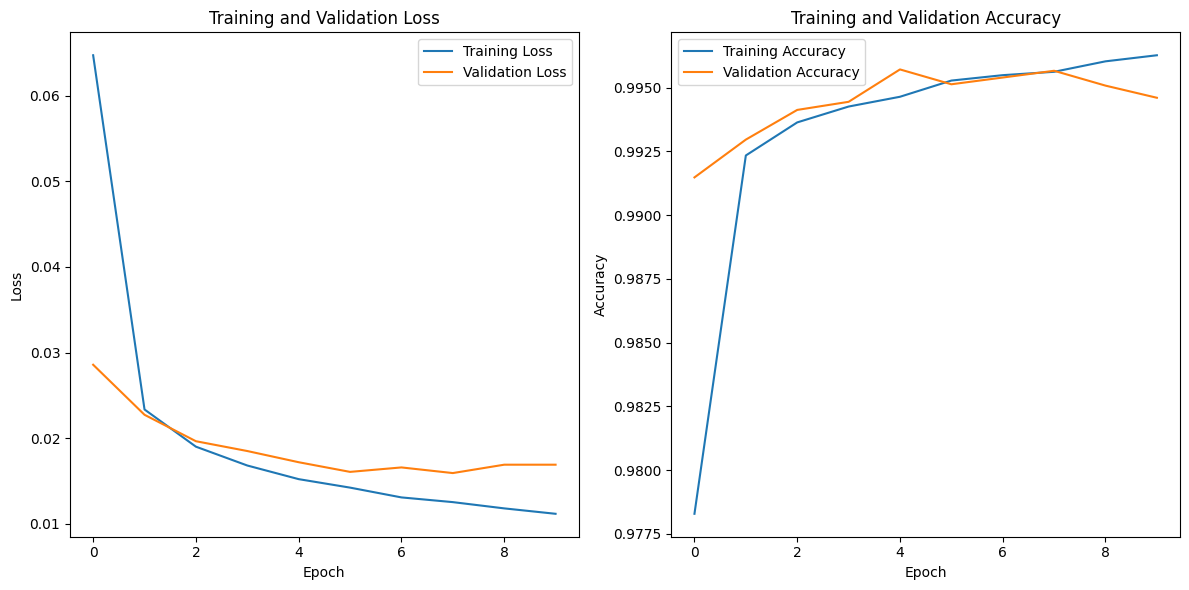

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test)
=threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
=y_pred = y_pred.ravel()

985/985 [==============================] - 3s 3ms/step


In [ ]:
=print(classification_report(y_test, y_pred,  target_names=bin_label_encoder.classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



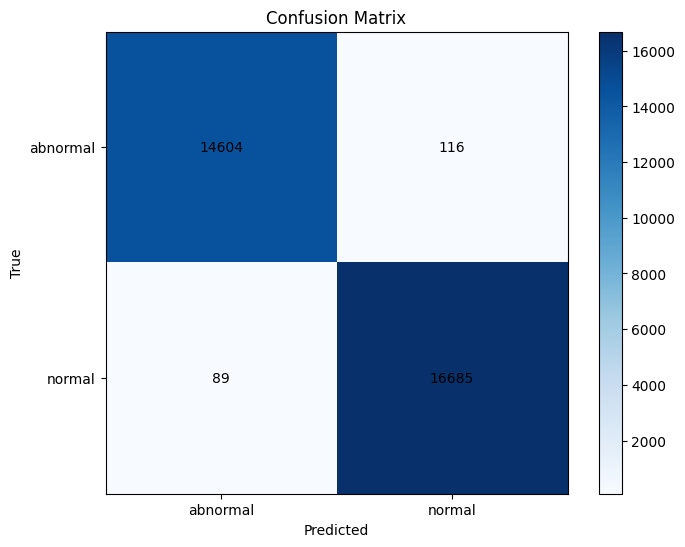

In [ ]:
target_names=bin_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_bin_full{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.993490823648949
F1 Score: 0.9938942665673864
Recall: 0.9946941695481102
Precision: 0.9930956490685078


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'bin_full_lstm_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification/bin_full_lstm_model.pkl


## Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=bin_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

    abnormal       1.00      0.70      0.82     14720
      normal       0.79      1.00      0.88     16774

    accuracy                           0.86     31494
   macro avg       0.89      0.85      0.85     31494
weighted avg       0.89      0.86      0.86     31494



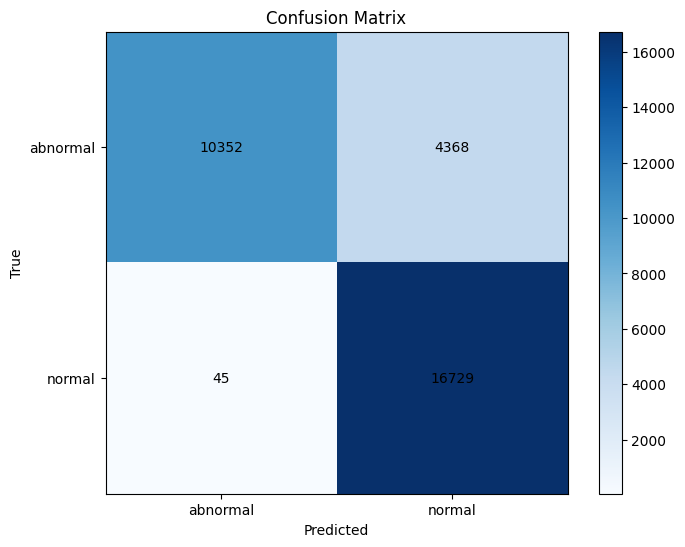

In [ ]:
target_names=bin_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_bin_full{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.86
F1 Score: 0.88
Recall: 1.00
Precision: 0.79


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'bin_full_naive_bayes_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification/bin_full_naive_bayes_model.pkl


## Logistic Regression

In [ ]:
X = bin_data.drop('label', axis=1)
y = bin_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = LogisticRegression(random_state=42, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=bin_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

    abnormal       0.98      0.96      0.97     14720
      normal       0.97      0.98      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



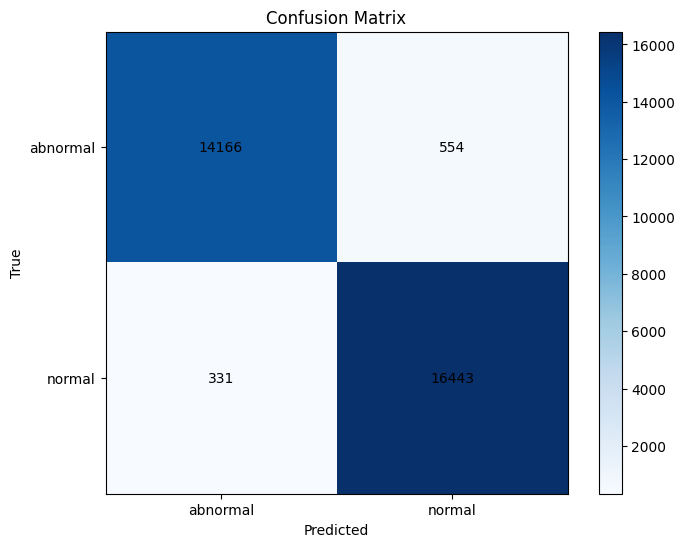

In [ ]:
target_names=bin_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_bin_full{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.97
F1 Score: 0.97
Recall: 0.98
Precision: 0.97


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'bin_full_logistic_regression_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification/bin_full_logistic_regression_model.pkl


## Random Forest

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=bin_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

    abnormal       1.00      1.00      1.00     14720
      normal       1.00      1.00      1.00     16774

    accuracy                           1.00     31494
   macro avg       1.00      1.00      1.00     31494
weighted avg       1.00      1.00      1.00     31494



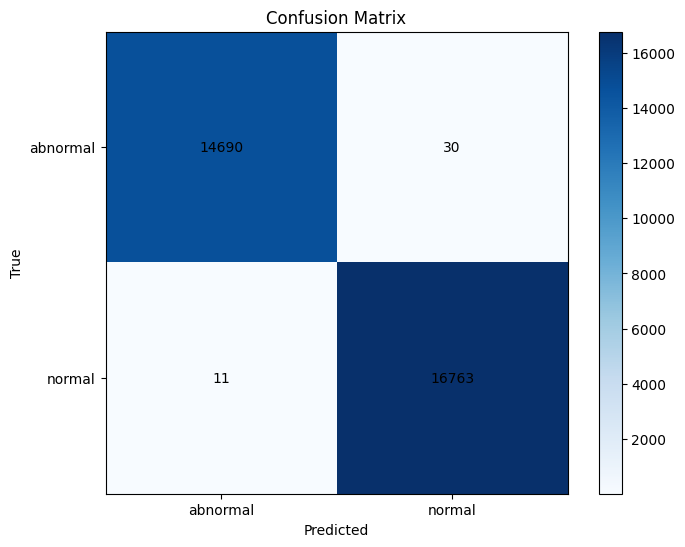

In [ ]:
target_names=bin_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_bin_full{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.97
F1 Score: 0.97
Recall: 0.98
Precision: 0.97


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'bin_full_random_forest_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification/bin_full_random_forest_model.pkl


## KNN

In [ ]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=bin_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

    abnormal       0.99      1.00      1.00     14720
      normal       1.00      1.00      1.00     16774

    accuracy                           1.00     31494
   macro avg       1.00      1.00      1.00     31494
weighted avg       1.00      1.00      1.00     31494



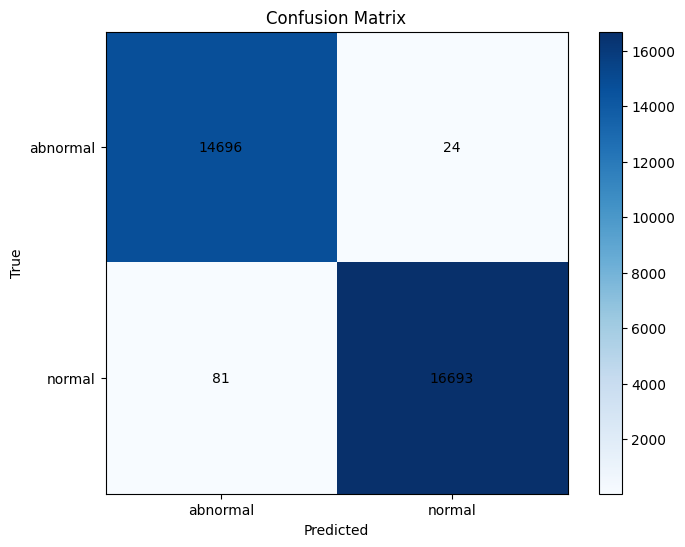

In [ ]:
target_names=bin_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_bin_full{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 1.00
F1 Score: 1.00
Recall: 1.00
Precision: 1.00


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'bin_full_knn_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification/bin_full_knn_model.pkl


## Support vector classifier

In [ ]:
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=bin_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

    abnormal       0.98      0.97      0.97     14720
      normal       0.97      0.98      0.98     16774

    accuracy                           0.98     31494
   macro avg       0.98      0.98      0.98     31494
weighted avg       0.98      0.98      0.98     31494



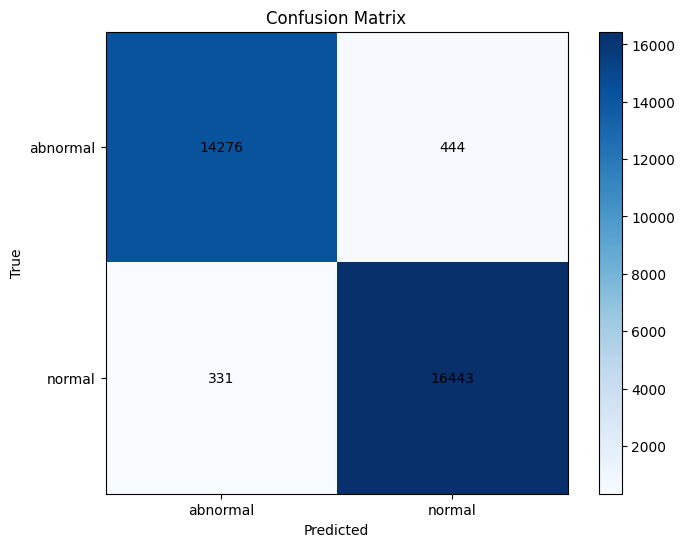

In [ ]:
target_names=bin_label_encoder.classes_

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_bin_full{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.98
F1 Score: 0.98
Recall: 0.98
Precision: 0.97


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'bin_full_svc_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification/bin_full_svc_model.pkl


## FNN

In [ ]:
X_train = X_train if isinstance(X_train, np.ndarray) else X_train.to_numpy()
X_test = X_test if isinstance(X_test, np.ndarray) else X_test.to_numpy()

K.clear_session()

In [ ]:
model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2362/2362 [==============================] - 14s 5ms/step - loss: 0.0639 - accuracy: 0.9788 - val_loss: 0.0339 - val_accuracy: 0.9880
Epoch 2/10
2362/2362 [==============================] - 9s 4ms/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.0261 - val_accuracy: 0.9908
Epoch 3/10
2362/2362 [==============================] - 7s 3ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0264 - val_accuracy: 0.9907
Epoch 4/10
2362/2362 [==============================] - 6s 3ms/step - loss: 0.0187 - accuracy: 0.9938 - val_loss: 0.0229 - val_accuracy: 0.9938
Epoch 5/10
2362/2362 [==============================] - 8s 4ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0232 - val_accuracy: 0.9919
Epoch 6/10
2362/2362 [==============================] - 6s 2ms/step - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.0191 - val_accuracy: 0.9947
Epoch 7/10
2362/2362 [==============================] - 8s 3ms/step - loss: 0.0157 - accuracy: 0.9947 - val_loss: 0.0198 - val_accuracy

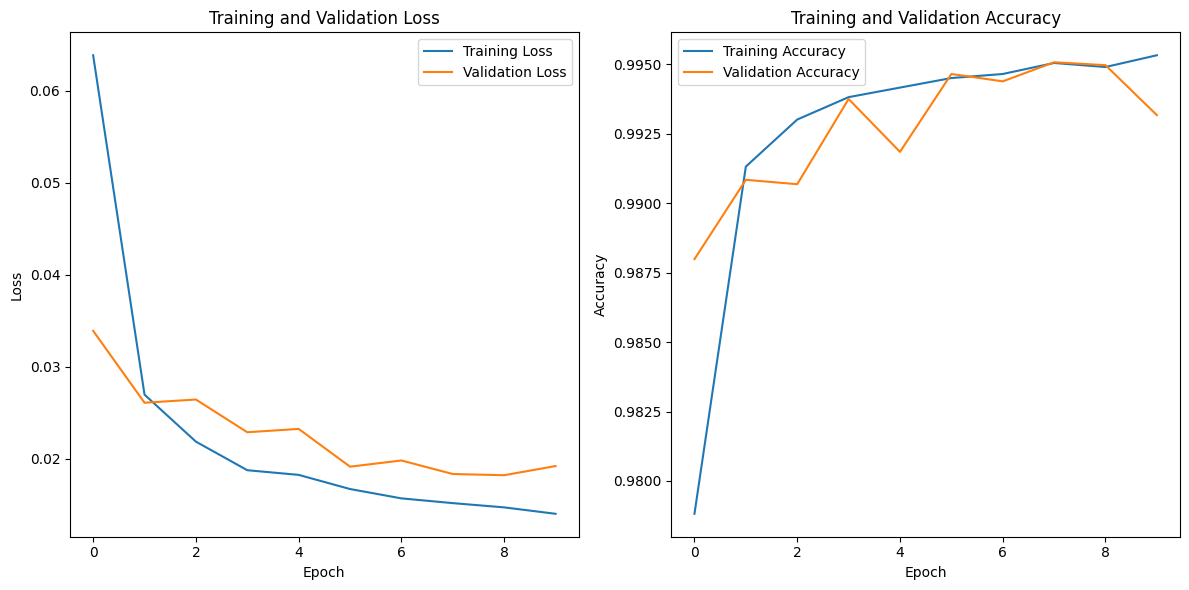

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
y_pred = y_pred.ravel()

985/985 [==============================] - 3s 3ms/step


In [ ]:
print(classification_report(y_test, y_pred,  target_names=bin_label_encoder.classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



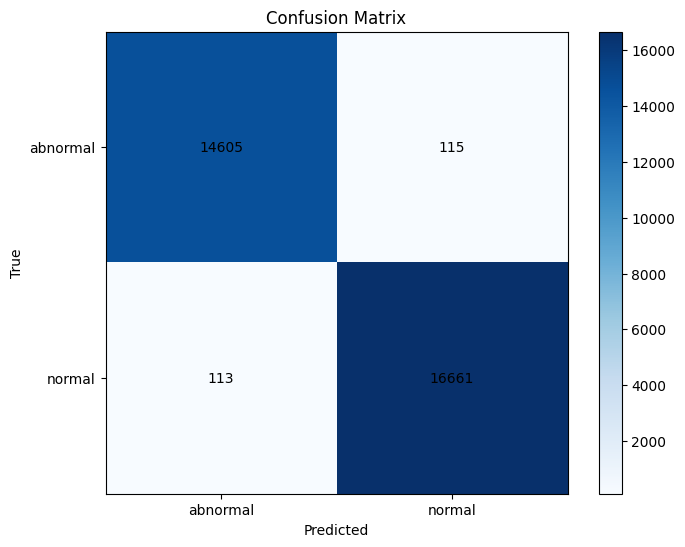

In [ ]:
target_names=bin_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_bin_full{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.9927605258144409
F1 Score: 0.993204172876304
Recall: 0.9932633838082747
Precision: 0.9931449690033382


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'bin_full_fnn_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification/bin_full_fnn_model.pkl


# Algorithms: Binary Classification (selected features only)

In [ ]:
bin_data = pd.read_csv('/content/drive/My Drive/cmput_644_project/datasets/bin_features_data.csv')
bin_data

,service_http,count,srv_serror_rate,flag_S0,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0.1,flag_S1,flag_S2,flag_S3,flag_SF.1,flag_SH,bin_label
0,0,-0.717045,-0.631929,0,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,...,0,0,0,0,0,0,0,1,0,normal
1,0,-0.620982,-0.631929,0,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,...,0,0,0,0,0,0,0,1,0,normal
2,0,0.339648,1.605104,1,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,...,0,0,0,1,0,0,0,0,0,abnormal
3,1,-0.690846,-0.184522,0,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,...,0,0,0,0,0,0,0,1,0,normal
4,1,-0.472521,-0.631929,0,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,...,0,0,0,0,0,0,0,1,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0.872361,1.605104,1,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,...,0,0,0,1,0,0,0,0,0,abnormal
125969,0,-0.717045,-0.631929,0,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,...,0,0,0,0,0,0,0,1,0,normal
125970,0,-0.725778,-0.631929,0,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,...,0,0,0,0,0,0,0,1,0,normal
125971,0,0.523041,1.605104,1,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,...,0,0,0,1,0,0,0,0,0,abnormal


In [ ]:
bin_label_encoder = LabelEncoder()
bin_data['bin_label'] = bin_label_encoder.fit_transform(bin_data['bin_label'])
bin_label_encoder.classes_

array(['abnormal', 'normal'], dtype=object)

In [ ]:
X = bin_data.drop('bin_label', axis=1)
y = bin_data['bin_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## LSTM

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
K.clear_session()

In [ ]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/10
2362/2362 [==============================] - 19s 7ms/step - loss: 0.0977 - accuracy: 0.9676 - val_loss: 0.0726 - val_accuracy: 0.9737
Epoch 2/10
2362/2362 [==============================] - 12s 5ms/step - loss: 0.0664 - accuracy: 0.9768 - val_loss: 0.0667 - val_accuracy: 0.9770
Epoch 3/10
2362/2362 [==============================] - 11s 5ms/step - loss: 0.0633 - accuracy: 0.9788 - val_loss: 0.0652 - val_accuracy: 0.9775
Epoch 4/10
2362/2362 [==============================] - 9s 4ms/step - loss: 0.0610 - accuracy: 0.9793 - val_loss: 0.0669 - val_accuracy: 0.9766
Epoch 5/10
2362/2362 [==============================] - 10s 4ms/step - loss: 0.0596 - accuracy: 0.9800 - val_loss: 0.0608 - val_accuracy: 0.9786
Epoch 6/10
2362/2362 [==============================] - 9s 4ms/step - loss: 0.0584 - accuracy: 0.9805 - val_loss: 0.0615 - val_accuracy: 0.9796
Epoch 7/10
2362/2362 [==============================] - 12s 5ms/step - loss: 0.0575 - accuracy: 0.9808 - val_loss: 0.0594 - val_accu

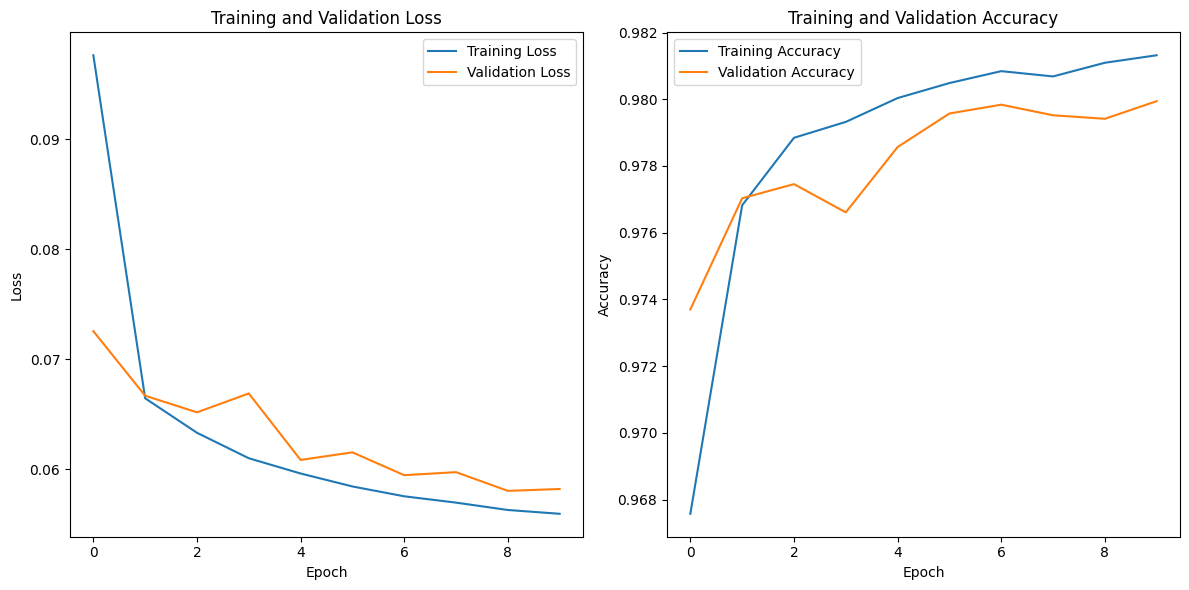

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
y_pred = y_pred.ravel()

985/985 [==============================] - 2s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred,  target_names=bin_label_encoder.classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.97      0.98     14720
      normal       0.98      0.99      0.98     16774

    accuracy                           0.98     31494
   macro avg       0.98      0.98      0.98     31494
weighted avg       0.98      0.98      0.98     31494



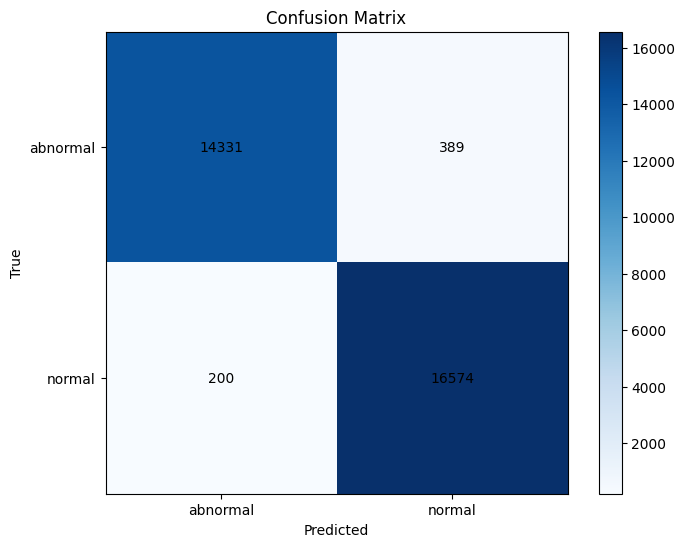

In [ ]:
target_names=bin_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')


plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_bin_selected_features{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.9812980250206389
F1 Score: 0.9825414233630732
Recall: 0.9880767855013711
Precision: 0.9770677356599659


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'bin_selected_features_lstm_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification/bin_selected_features_lstm_model.pkl


## Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=bin_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

    abnormal       1.00      0.67      0.80     14720
      normal       0.77      1.00      0.87     16774

    accuracy                           0.84     31494
   macro avg       0.89      0.83      0.84     31494
weighted avg       0.88      0.84      0.84     31494



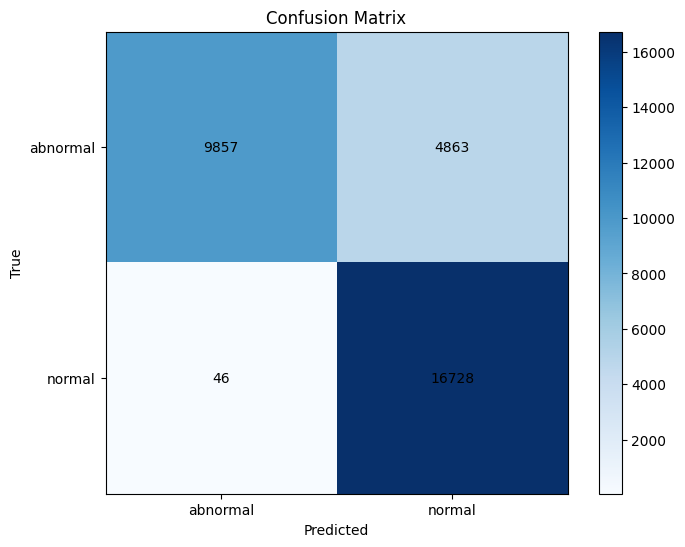

In [ ]:
target_names=bin_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_bin_selected_features{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.84
F1 Score: 0.87
Recall: 1.00
Precision: 0.77


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'bin_selected_features_naive_bayes_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification/bin_selected_features_naive_bayes_model.pkl


## Logistic Regression

In [ ]:
X = bin_data.drop('bin_label', axis=1)
y = bin_data['bin_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = LogisticRegression(random_state=42, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=bin_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

    abnormal       0.98      0.96      0.97     14720
      normal       0.96      0.98      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



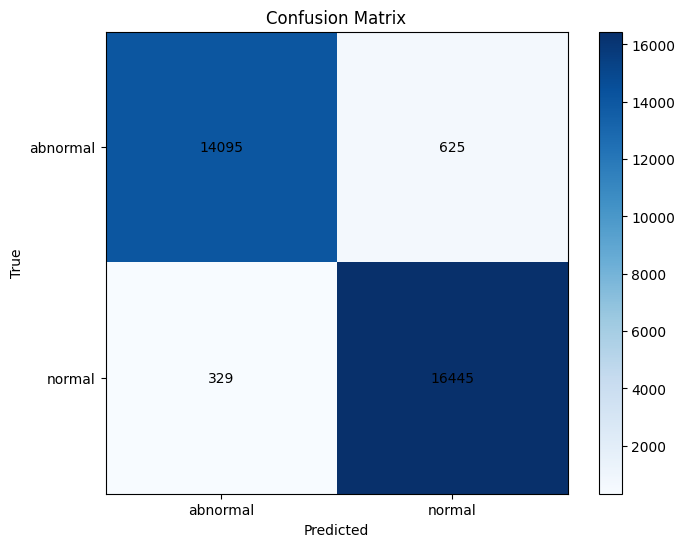

In [ ]:
target_names=bin_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_bin_selected_features{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.97
F1 Score: 0.97
Recall: 0.98
Precision: 0.96


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'bin_selected_features_logistic_regression_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification/bin_selected_features_logistic_regression_model.pkl


## Random forest

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=bin_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

    abnormal       0.99      0.98      0.99     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



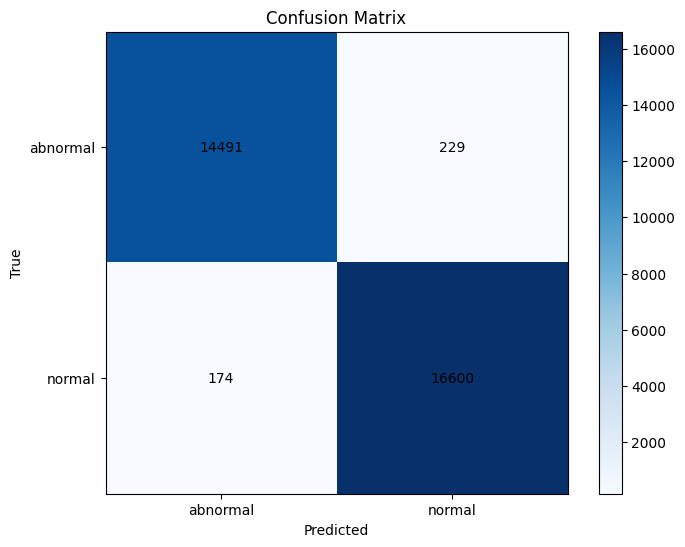

In [ ]:
target_names=bin_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_bin_selected_features{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.99
F1 Score: 0.99
Recall: 0.99
Precision: 0.99


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'bin_selected_features_random_forest_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification/bin_selected_features_random_forest_model.pkl


## KNN

In [ ]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=bin_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

    abnormal       0.97      0.99      0.98     14720
      normal       0.99      0.97      0.98     16774

    accuracy                           0.98     31494
   macro avg       0.98      0.98      0.98     31494
weighted avg       0.98      0.98      0.98     31494



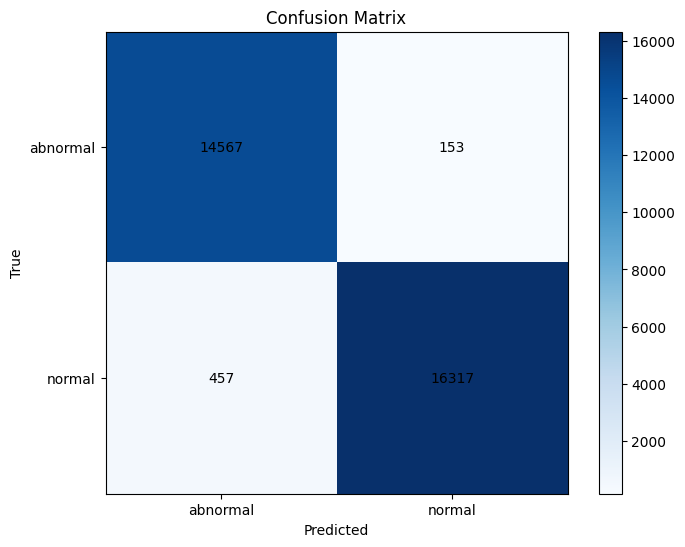

In [ ]:
target_names=bin_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_bin_selected_features{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.98
F1 Score: 0.98
Recall: 0.97
Precision: 0.99


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'bin_selected_features_knn_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification/bin_selected_features_knn_model.pkl


## Support vector classifier

In [ ]:
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=bin_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.97      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



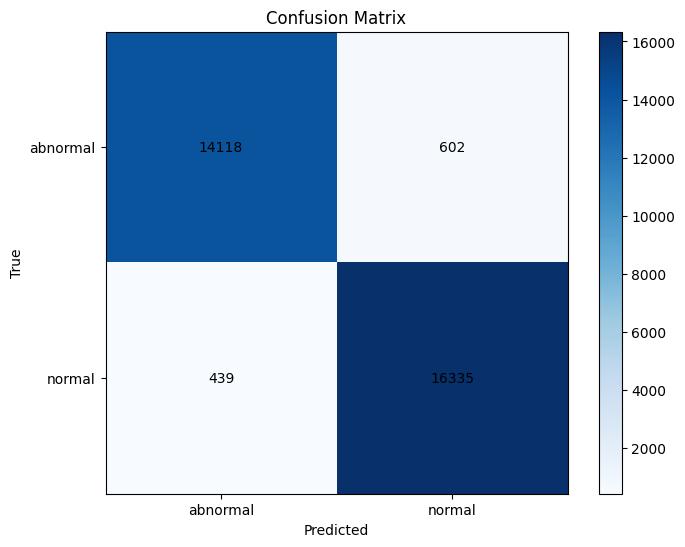

In [ ]:
target_names=bin_label_encoder.classes_

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_bin_selected_features{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.97
F1 Score: 0.97
Recall: 0.97
Precision: 0.96


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'bin_selected_features_svc_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification/bin_selected_features_svc_model.pkl


## FNN

In [ ]:
X_train = X_train if isinstance(X_train, np.ndarray) else X_train.to_numpy()
X_test = X_test if isinstance(X_test, np.ndarray) else X_test.to_numpy()

K.clear_session()

In [ ]:
model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2362/2362 [==============================] - 15s 5ms/step - loss: 0.0911 - accuracy: 0.9701 - val_loss: 0.0713 - val_accuracy: 0.9753
Epoch 2/10
2362/2362 [==============================] - 9s 4ms/step - loss: 0.0662 - accuracy: 0.9775 - val_loss: 0.0654 - val_accuracy: 0.9767
Epoch 3/10
2362/2362 [==============================] - 6s 3ms/step - loss: 0.0630 - accuracy: 0.9788 - val_loss: 0.0645 - val_accuracy: 0.9777
Epoch 4/10
2362/2362 [==============================] - 6s 2ms/step - loss: 0.0607 - accuracy: 0.9796 - val_loss: 0.0615 - val_accuracy: 0.9778
Epoch 5/10
2362/2362 [==============================] - 7s 3ms/step - loss: 0.0595 - accuracy: 0.9802 - val_loss: 0.0612 - val_accuracy: 0.9790
Epoch 6/10
2362/2362 [==============================] - 6s 2ms/step - loss: 0.0584 - accuracy: 0.9806 - val_loss: 0.0602 - val_accuracy: 0.9790
Epoch 7/10
2362/2362 [==============================] - 11s 5ms/step - loss: 0.0575 - accuracy: 0.9807 - val_loss: 0.0600 - val_accurac

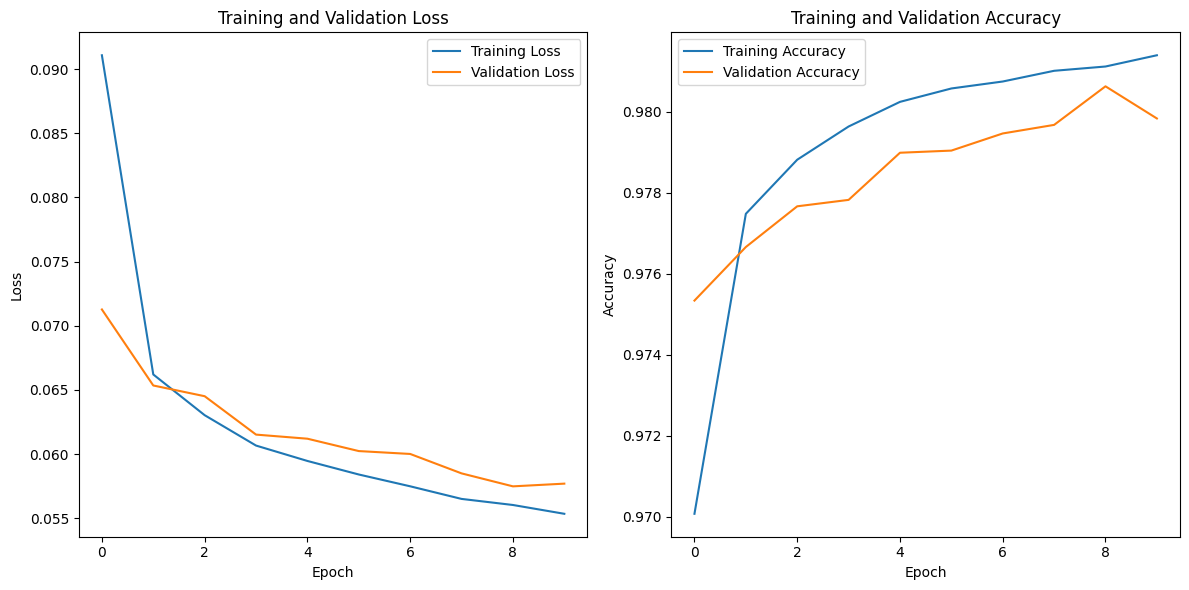

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
y_pred = y_pred.ravel()

985/985 [==============================] - 2s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred,  target_names=bin_label_encoder.classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.97      0.98     14720
      normal       0.98      0.99      0.98     16774

    accuracy                           0.98     31494
   macro avg       0.98      0.98      0.98     31494
weighted avg       0.98      0.98      0.98     31494



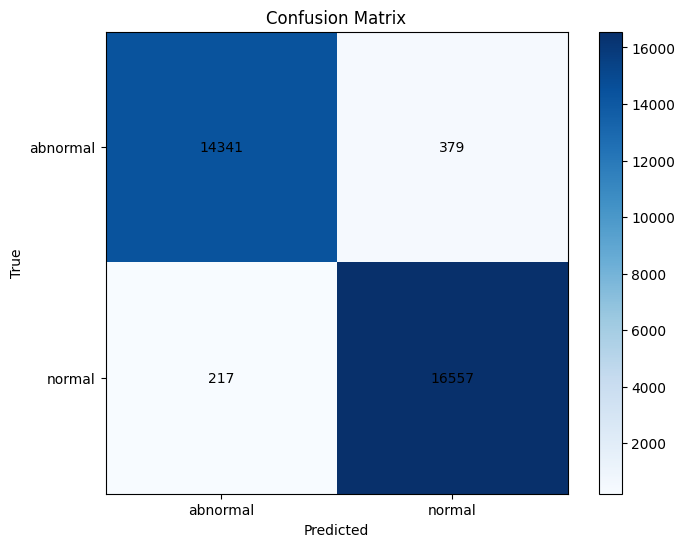

In [ ]:
target_names=bin_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_bin_selected_features{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.9810757604623103
F1 Score: 0.982319786413527
Recall: 0.9870633122689877
Precision: 0.9776216343882853


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'bin_selected_features_fnn_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/BinaryClassification/bin_selected_features_fnn_model.pkl


# Algorithms: Multi Classification (full data)

In [ ]:
multi_data = pd.read_csv('/content/drive/My Drive/cmput_644_project/datasets/multi_data_full.csv')
multi_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,1,0,0,0,0,0,Dos
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,1,0,0,0,0,0,Dos
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,1,0,0,0,0,0,Dos


In [ ]:
multi_label_encoder = LabelEncoder()
multi_data['label'] = multi_label_encoder.fit_transform(multi_data['label'])
multi_label_encoder.classes_

array(['Dos', 'Probe', 'R2L', 'U2R', 'normal'], dtype=object)

In [ ]:
X = multi_data.drop('label', axis=1)
y = multi_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## SVC

In [ ]:
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=multi_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

         Dos       1.00      1.00      1.00     11484
       Probe       0.97      0.97      0.97      2947
         R2L       0.82      0.84      0.83       274
         U2R       0.64      0.47      0.54        15
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.88      0.85      0.87     31494
weighted avg       0.99      0.99      0.99     31494



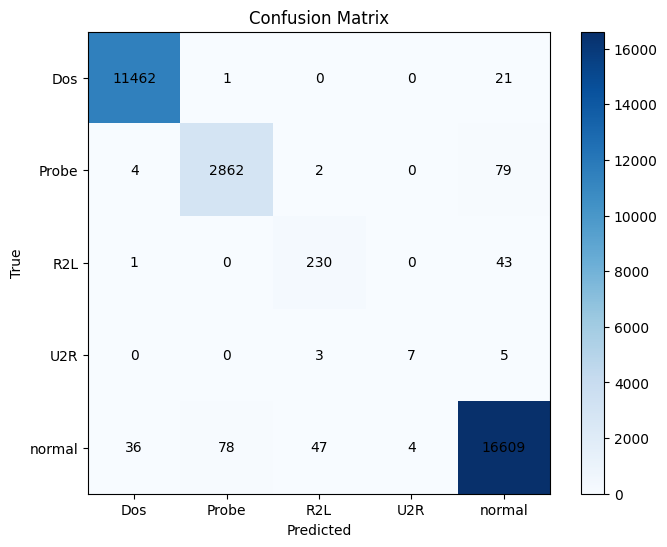

In [ ]:
target_names=multi_label_encoder.classes_

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_multi_full{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.99
F1 Score: 0.99
Recall: 0.99
Precision: 0.99


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'multi_full_svc_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification/multi_full_svc_model.pkl


## LSTM

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
K.clear_session()

In [ ]:
num_classes = 5

model = Sequential()
model.add(LSTM(units=64, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2362/2362 [==============================] - 14s 5ms/step - loss: 0.0897 - accuracy: 0.9776 - val_loss: 0.0303 - val_accuracy: 0.9906
Epoch 2/10
2362/2362 [==============================] - 10s 4ms/step - loss: 0.0244 - accuracy: 0.9925 - val_loss: 0.0229 - val_accuracy: 0.9932
Epoch 3/10
2362/2362 [==============================] - 12s 5ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0208 - val_accuracy: 0.9926
Epoch 4/10
2362/2362 [==============================] - 12s 5ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0181 - val_accuracy: 0.9947
Epoch 5/10
2362/2362 [==============================] - 9s 4ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0175 - val_accuracy: 0.9954
Epoch 6/10
2362/2362 [==============================] - 11s 5ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0238 - val_accuracy: 0.9936
Epoch 7/10
2362/2362 [==============================] - 12s 5ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0172 - val_acc

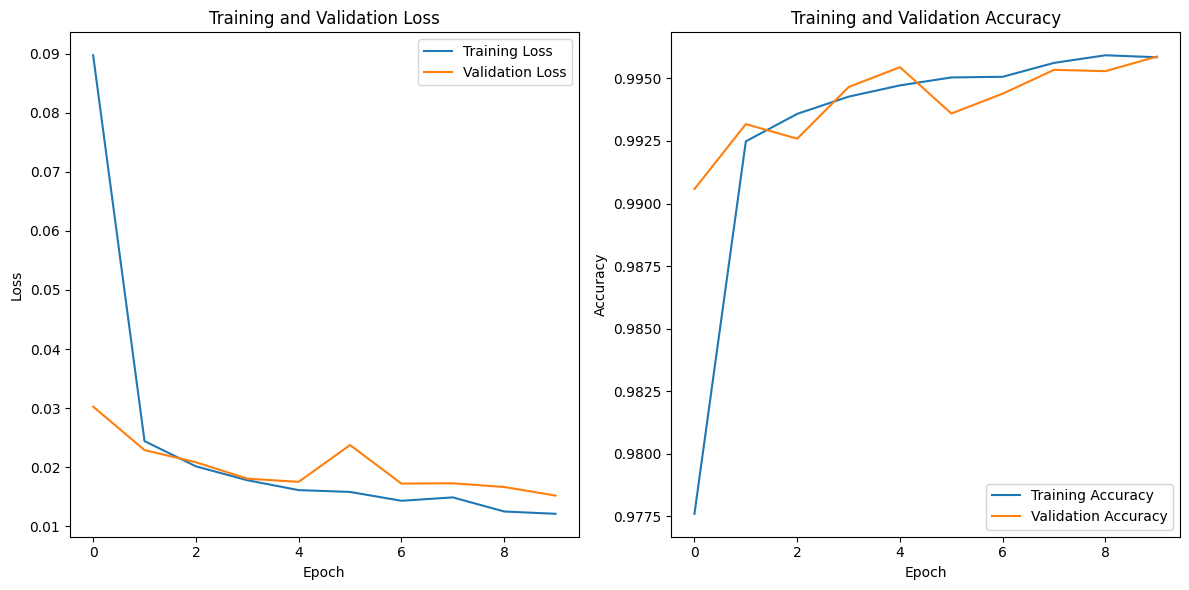

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

985/985 [==============================] - 3s 3ms/step


In [ ]:
print(classification_report(y_test, y_pred,  target_names=multi_label_encoder.classes_))

              precision    recall  f1-score   support

         Dos       1.00      1.00      1.00     11484
       Probe       0.99      0.99      0.99      2947
         R2L       0.90      0.87      0.88       274
         U2R       0.67      0.40      0.50        15
      normal       1.00      0.99      1.00     16774

   micro avg       0.99      0.99      0.99     31494
   macro avg       0.91      0.85      0.87     31494
weighted avg       0.99      0.99      0.99     31494
 samples avg       0.99      0.99      0.99     31494



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

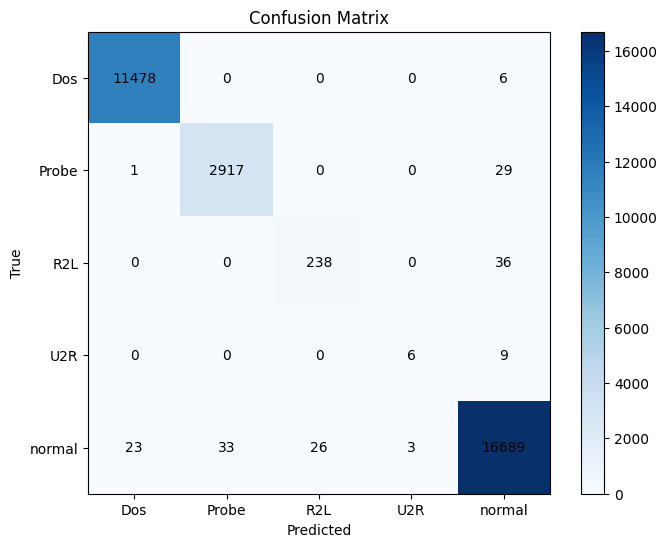

In [ ]:
target_names=multi_label_encoder.classes_
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_multi_full{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.99
F1 Score: 0.99
Recall: 0.99
Precision: 0.99


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'multi_full_lstm_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification/multi_full_lstm_model.pkl


## Logistic regression

In [ ]:
X = multi_data.drop('label', axis=1)
y = multi_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = LogisticRegression(random_state=42, max_iter=10000)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=multi_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

         Dos       1.00      1.00      1.00     11484
       Probe       0.97      0.95      0.96      2947
         R2L       0.81      0.81      0.81       274
         U2R       0.80      0.27      0.40        15
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.91      0.80      0.83     31494
weighted avg       0.99      0.99      0.99     31494



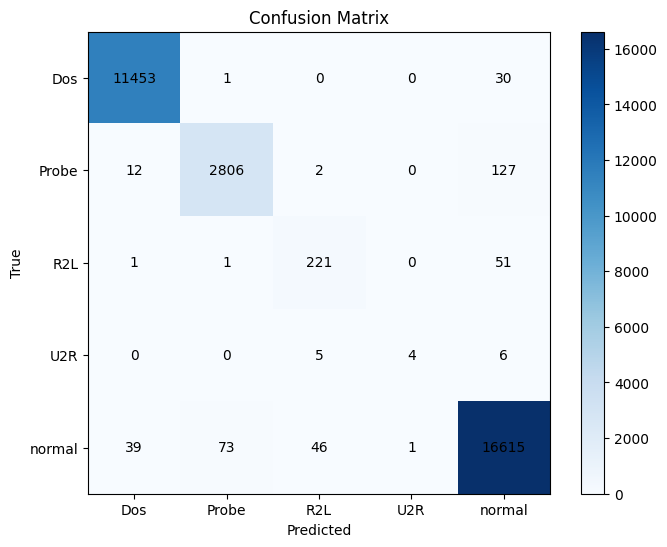

In [ ]:
target_names=multi_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_multi_full{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.99
F1 Score: 0.99
Recall: 0.99
Precision: 0.99


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'multi_full_logistic regression_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification/multi_full_logistic regression_model.pkl


## random forest

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=multi_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

         Dos       1.00      1.00      1.00     11484
       Probe       1.00      1.00      1.00      2947
         R2L       1.00      0.96      0.98       274
         U2R       0.83      0.33      0.48        15
      normal       1.00      1.00      1.00     16774

    accuracy                           1.00     31494
   macro avg       0.97      0.86      0.89     31494
weighted avg       1.00      1.00      1.00     31494



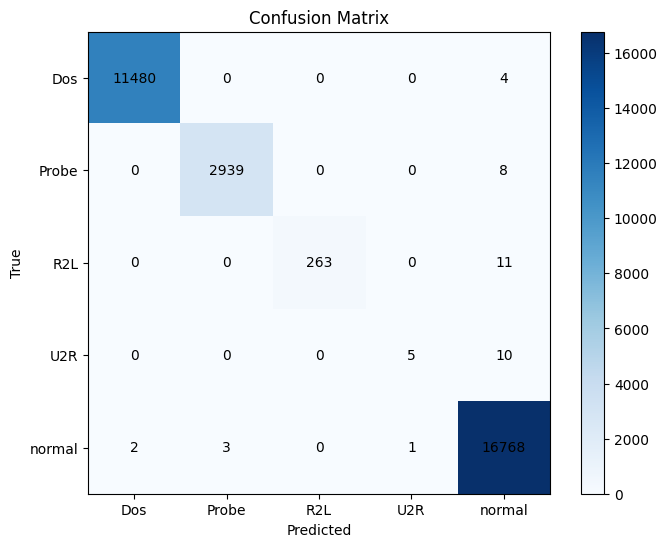

In [ ]:
target_names=multi_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_multi_full{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 1.00
F1 Score: 1.00
Recall: 1.00
Precision: 1.00


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'multi_full_random forest_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification/multi_full_random forest_model.pkl


## knn

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=multi_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

         Dos       1.00      1.00      1.00     11484
       Probe       0.99      0.99      0.99      2947
         R2L       0.94      0.93      0.93       274
         U2R       0.50      0.33      0.40        15
      normal       1.00      1.00      1.00     16774

    accuracy                           1.00     31494
   macro avg       0.88      0.85      0.86     31494
weighted avg       1.00      1.00      1.00     31494



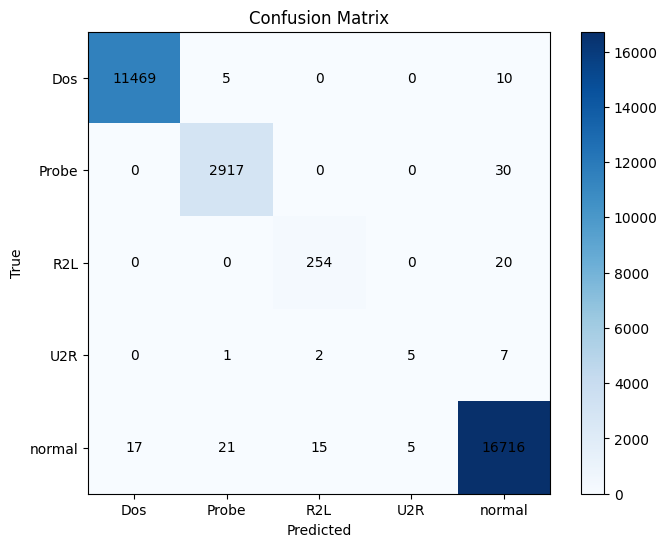

In [ ]:
target_names=multi_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_multi_full{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 1.00
F1 Score: 1.00
Recall: 1.00
Precision: 1.00


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'multi_full_knn_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification/multi_full_knn_model.pkl


## naive bayes

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=multi_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

         Dos       0.98      0.92      0.95     11484
       Probe       0.96      0.25      0.39      2947
         R2L       0.03      0.55      0.05       274
         U2R       0.01      0.87      0.02        15
      normal       0.80      0.63      0.70     16774

    accuracy                           0.70     31494
   macro avg       0.56      0.64      0.42     31494
weighted avg       0.88      0.70      0.76     31494



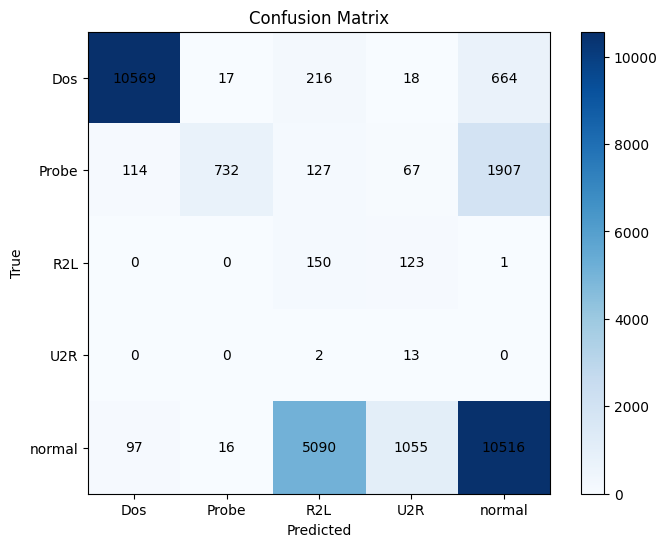

In [ ]:
target_names=multi_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_multi_full{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.70
F1 Score: 0.76
Recall: 0.70
Precision: 0.88


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)


model_path = os.path.join(model_dir, 'multi_full_naive_bayes_model.pkl')


joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification/multi_full_naive_bayes_model.pkl


## fnn

In [ ]:
X_train = X_train if isinstance(X_train, np.ndarray) else X_train.to_numpy()
X_test = X_test if isinstance(X_test, np.ndarray) else X_test.to_numpy()

if y_train.ndim == 1 or y_test.ndim == 1:
    num_classes = len(np.unique(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
else:
    num_classes = y_train.shape[1]

K.clear_session()

In [ ]:

model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2362/2362 [==============================] - 18s 7ms/step - loss: 0.0934 - accuracy: 0.9749 - val_loss: 0.0352 - val_accuracy: 0.9894
Epoch 2/10
2362/2362 [==============================] - 9s 4ms/step - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0311 - val_accuracy: 0.9895
Epoch 3/10
2362/2362 [==============================] - 8s 3ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.0233 - val_accuracy: 0.9936
Epoch 4/10
2362/2362 [==============================] - 5s 2ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 0.0209 - val_accuracy: 0.9938
Epoch 5/10
2362/2362 [==============================] - 7s 3ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.0195 - val_accuracy: 0.9944
Epoch 6/10
2362/2362 [==============================] - 7s 3ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0194 - val_accuracy: 0.9939
Epoch 7/10
2362/2362 [==============================] - 6s 3ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0198 - val_accuracy

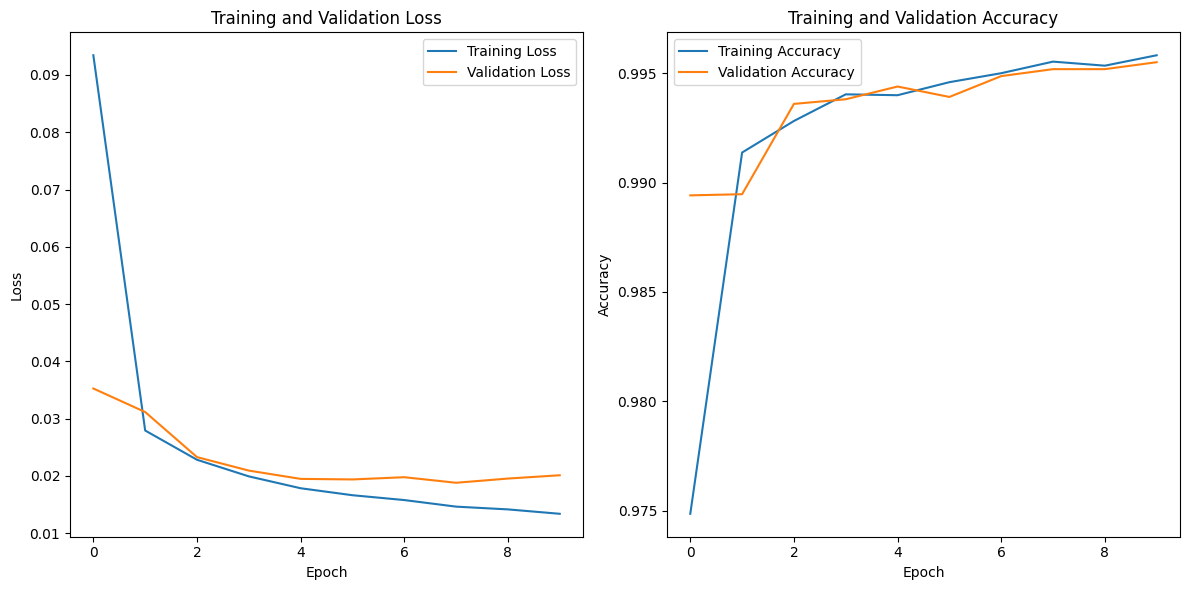

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test)

threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

985/985 [==============================] - 2s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred,  target_names=multi_label_encoder.classes_))

              precision    recall  f1-score   support

         Dos       1.00      1.00      1.00     11484
       Probe       0.99      0.98      0.99      2947
         R2L       0.93      0.82      0.87       274
         U2R       0.70      0.47      0.56        15
      normal       0.99      1.00      1.00     16774

   micro avg       0.99      0.99      0.99     31494
   macro avg       0.92      0.85      0.88     31494
weighted avg       0.99      0.99      0.99     31494
 samples avg       0.99      0.99      0.99     31494



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

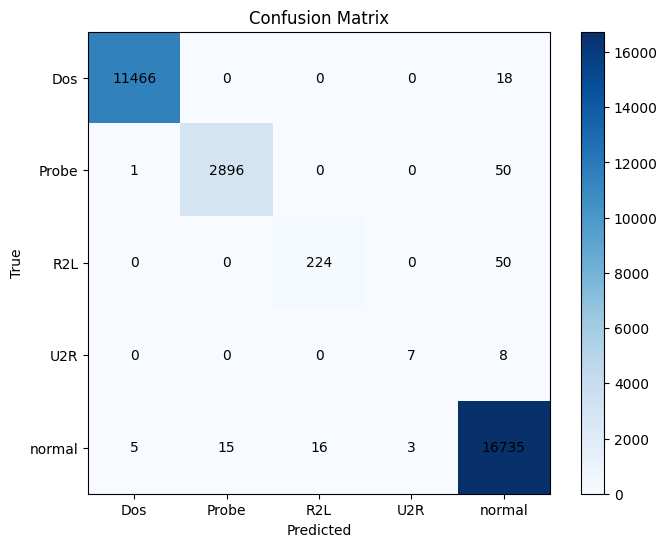

In [ ]:
target_names=multi_label_encoder.classes_
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_multi_full{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.99
F1 Score: 0.99
Recall: 0.99
Precision: 0.99


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'multi_full_fnn_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification/multi_full_fnn_model.pkl


# Algorithms: Multi classification (selected features only)

In [ ]:
multi_data = pd.read_csv('/content/drive/My Drive/cmput_644_project/datasets/multi_features_data.csv')
multi_data

,service_http,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,flag_S0,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0.1,flag_S1,flag_S2,flag_S3,flag_SF.1,flag_SH,multi_label
0,0,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,0,-0.782367,-0.624871,-0.818890,...,0,0,0,0,0,0,0,1,0,normal
1,0,-0.620982,-0.809262,-0.631929,-0.637209,-0.639532,0,-1.161030,-0.624871,-1.035688,...,0,0,0,0,0,0,0,1,0,normal
2,0,0.339648,-0.809262,1.605104,1.602664,1.608759,1,-0.938287,1.618955,-0.809857,...,0,0,0,1,0,0,0,0,0,Dos
3,1,-0.690846,1.235694,-0.184522,-0.189235,-0.572083,0,1.066401,-0.602433,1.258754,...,0,0,0,0,0,0,0,1,0,normal
4,1,-0.472521,1.235694,-0.631929,-0.637209,-0.639532,0,1.066401,-0.624871,1.258754,...,0,0,0,0,0,0,0,1,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0.872361,-0.809262,1.605104,1.602664,1.608759,1,-0.938287,1.618955,-0.818890,...,0,0,0,1,0,0,0,0,0,Dos
125969,0,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,0,0.977304,-0.624871,1.159389,...,0,0,0,0,0,0,0,1,0,normal
125970,0,-0.725778,1.235694,-0.631929,-0.637209,0.979238,0,-0.893738,-0.624871,-0.773724,...,0,0,0,0,0,0,0,1,0,normal
125971,0,0.523041,-0.809262,1.605104,1.602664,1.608759,1,-1.094207,1.618955,-0.972455,...,0,0,0,1,0,0,0,0,0,Dos


In [ ]:
multi_label_encoder = LabelEncoder()
multi_data['multi_label'] = multi_label_encoder.fit_transform(multi_data['multi_label'])
multi_label_encoder.classes_

array(['Dos', 'Probe', 'R2L', 'U2R', 'normal'], dtype=object)

In [ ]:
X = multi_data.drop('multi_label', axis=1)
y = multi_data['multi_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## SVC

In [ ]:
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=multi_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

         Dos       0.95      0.96      0.96     11484
       Probe       0.86      0.79      0.83      2947
         R2L       0.60      0.60      0.60       274
         U2R       0.00      0.00      0.00        15
      normal       0.97      0.98      0.98     16774

    accuracy                           0.95     31494
   macro avg       0.68      0.67      0.67     31494
weighted avg       0.95      0.95      0.95     31494



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


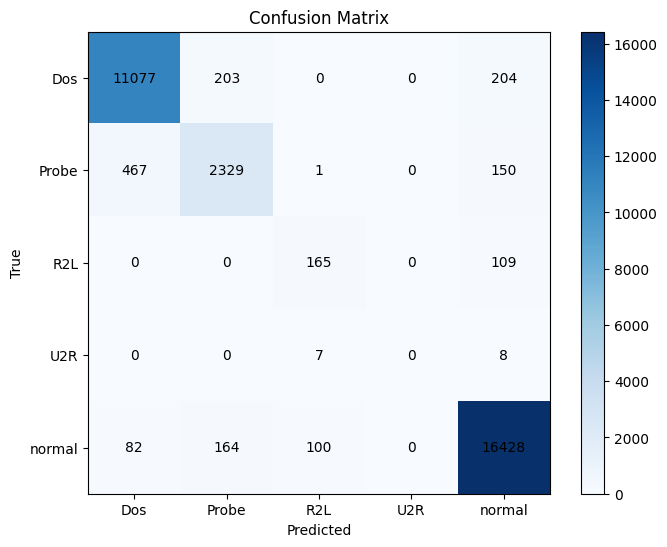

In [ ]:
target_names=multi_label_encoder.classes_

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")


for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_multi_selected_features{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.95
F1 Score: 0.95
Recall: 0.95
Precision: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'multi_selected_features_svc_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification/multi_selected_features_svc_model.pkl


## lstm

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
K.clear_session()

In [ ]:
num_classes = 5

model = Sequential()
model.add(LSTM(units=64, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2362/2362 [==============================] - 12s 5ms/step - loss: 0.1703 - accuracy: 0.9493 - val_loss: 0.0993 - val_accuracy: 0.9633
Epoch 2/10
2362/2362 [==============================] - 10s 4ms/step - loss: 0.0928 - accuracy: 0.9680 - val_loss: 0.0897 - val_accuracy: 0.9709
Epoch 3/10
2362/2362 [==============================] - 11s 5ms/step - loss: 0.0843 - accuracy: 0.9710 - val_loss: 0.0806 - val_accuracy: 0.9729
Epoch 4/10
2362/2362 [==============================] - 12s 5ms/step - loss: 0.0789 - accuracy: 0.9737 - val_loss: 0.0767 - val_accuracy: 0.9713
Epoch 5/10
2362/2362 [==============================] - 10s 4ms/step - loss: 0.0750 - accuracy: 0.9747 - val_loss: 0.0744 - val_accuracy: 0.9740
Epoch 6/10
2362/2362 [==============================] - 11s 5ms/step - loss: 0.0722 - accuracy: 0.9759 - val_loss: 0.0748 - val_accuracy: 0.9754
Epoch 7/10
2362/2362 [==============================] - 11s 5ms/step - loss: 0.0697 - accuracy: 0.9771 - val_loss: 0.0713 - val_ac

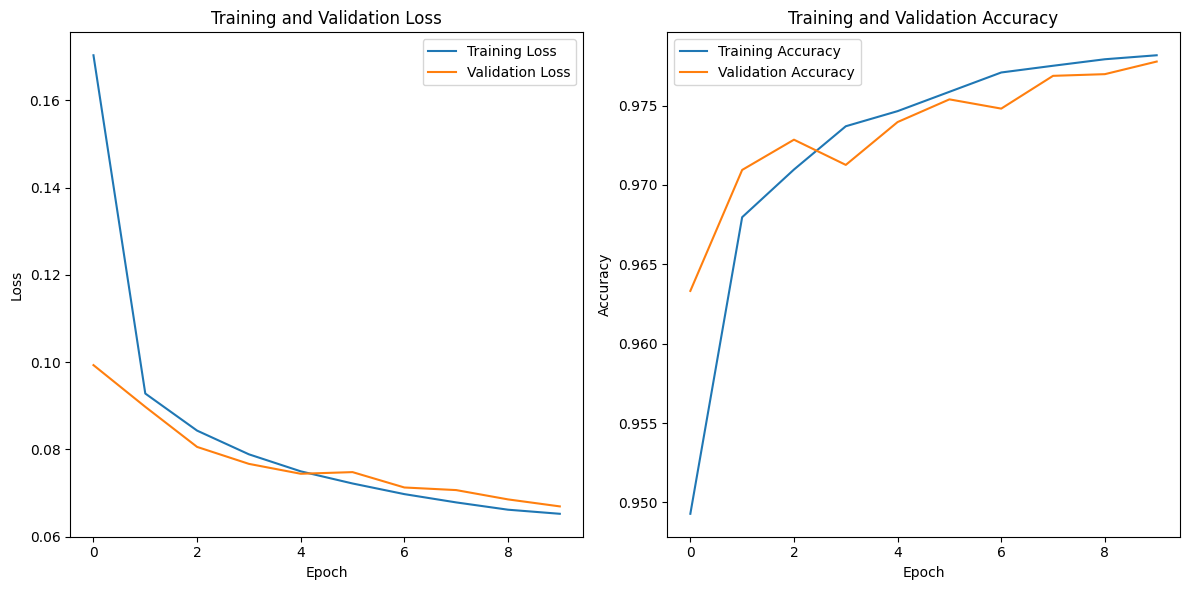

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)


985/985 [==============================] - 3s 3ms/step


In [ ]:
print(classification_report(y_test, y_pred,  target_names=multi_label_encoder.classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.98      0.99     11484
       Probe       0.96      0.93      0.95      2947
         R2L       0.86      0.66      0.75       274
         U2R       0.00      0.00      0.00        15
      normal       0.97      0.99      0.98     16774

   micro avg       0.98      0.98      0.98     31494
   macro avg       0.76      0.71      0.73     31494
weighted avg       0.98      0.98      0.98     31494
 samples avg       0.98      0.98      0.98     31494



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

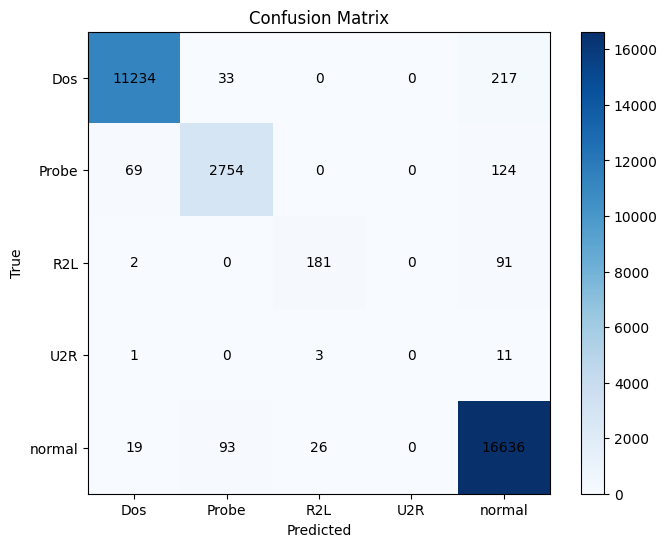

In [ ]:
target_names=multi_label_encoder.classes_
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")


for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_multi_selected_features{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.98
F1 Score: 0.98
Recall: 0.98
Precision: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import joblib


model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification'


if not os.path.exists(model_dir):
    os.makedirs(model_dir)


model_path = os.path.join(model_dir, 'multi_selected_features_lstm_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification/multi_selected_features_lstm_model.pkl


## logistic regression

In [ ]:
X = multi_data.drop('multi_label', axis=1)
y = multi_data['multi_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = LogisticRegression(random_state=42, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=multi_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

         Dos       0.96      0.96      0.96     11484
       Probe       0.86      0.82      0.84      2947
         R2L       0.71      0.59      0.65       274
         U2R       0.00      0.00      0.00        15
      normal       0.97      0.98      0.98     16774

    accuracy                           0.95     31494
   macro avg       0.70      0.67      0.68     31494
weighted avg       0.95      0.95      0.95     31494



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


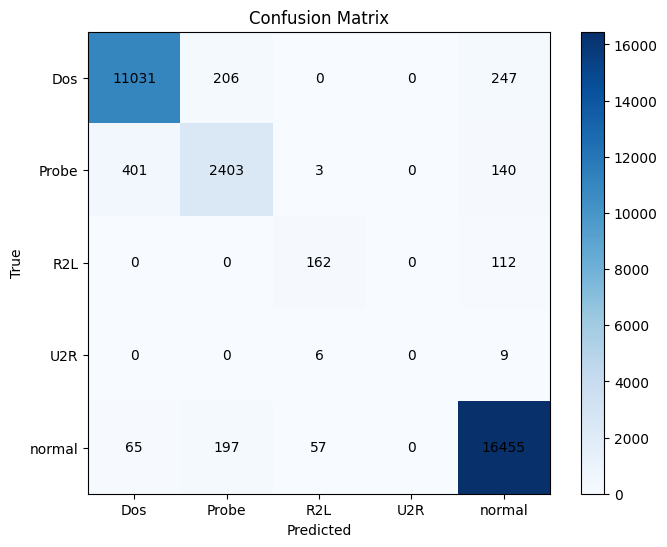

In [ ]:
target_names=multi_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_multi_selected_features{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.95
F1 Score: 0.95
Recall: 0.95
Precision: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'multi_selected_features_logistic_regression_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification/multi_selected_features_logistic_regression_model.pkl


## random forest

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=multi_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

         Dos       0.99      0.99      0.99     11484
       Probe       0.97      0.97      0.97      2947
         R2L       0.92      0.86      0.89       274
         U2R       0.29      0.13      0.18        15
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.83      0.79      0.80     31494
weighted avg       0.98      0.99      0.99     31494



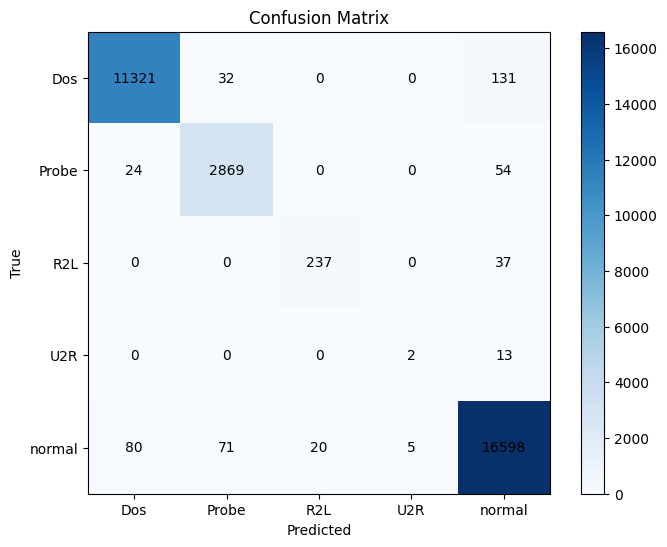

In [ ]:
target_names=multi_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_multi_selected_features{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.99
F1 Score: 0.99
Recall: 0.99
Precision: 0.98


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'multi_selected_features_random_forest_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification/multi_selected_features_random_forest_model.pkl


## knn

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=multi_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

         Dos       0.99      0.99      0.99     11484
       Probe       0.95      0.97      0.96      2947
         R2L       0.89      0.87      0.88       274
         U2R       0.40      0.13      0.20        15
      normal       0.99      0.99      0.99     16774

    accuracy                           0.98     31494
   macro avg       0.84      0.79      0.80     31494
weighted avg       0.98      0.98      0.98     31494



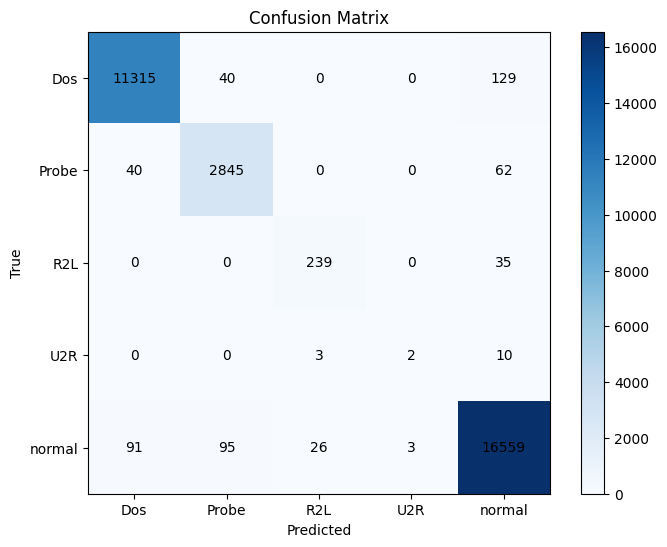

In [ ]:
target_names=multi_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_multi_selected_features{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.98
F1 Score: 0.98
Recall: 0.98
Precision: 0.98


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'multi_selected_features_knn_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification/multi_selected_features_knn_model.pkl


## naive bayes

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=multi_label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

         Dos       0.98      0.83      0.90     11484
       Probe       0.89      0.06      0.12      2947
         R2L       0.11      0.26      0.15       274
         U2R       0.01      0.93      0.01        15
      normal       0.77      0.86      0.82     16774

    accuracy                           0.77     31494
   macro avg       0.55      0.59      0.40     31494
weighted avg       0.85      0.77      0.78     31494



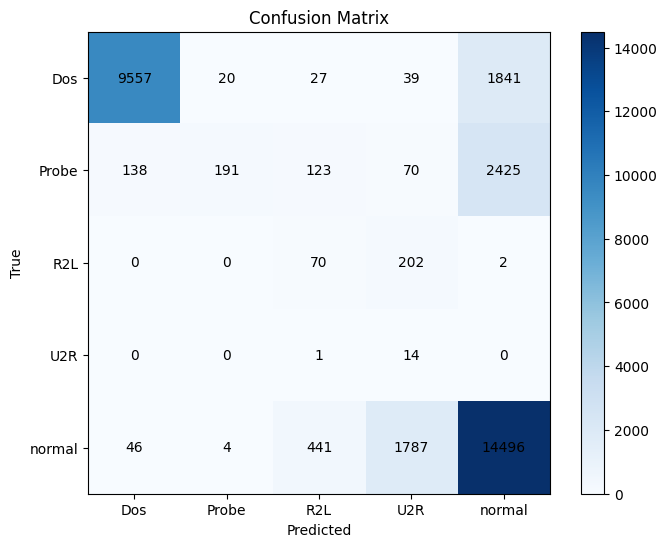

In [ ]:
target_names=multi_label_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_multi_selected_features{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.77
F1 Score: 0.78
Recall: 0.77
Precision: 0.85


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'multi_selected_features_naive_bayes_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification/multi_selected_features_naive_bayes_model.pkl


## fnn

In [ ]:
X_train = X_train if isinstance(X_train, np.ndarray) else X_train.to_numpy()
X_test = X_test if isinstance(X_test, np.ndarray) else X_test.to_numpy()

if y_train.ndim == 1 or y_test.ndim == 1:
    num_classes = len(np.unique(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
else:
    num_classes = y_train.shape[1]

K.clear_session()

In [ ]:
model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2362/2362 [==============================] - 9s 4ms/step - loss: 0.1534 - accuracy: 0.9524 - val_loss: 0.1021 - val_accuracy: 0.9646
Epoch 2/10
2362/2362 [==============================] - 6s 3ms/step - loss: 0.0936 - accuracy: 0.9678 - val_loss: 0.0891 - val_accuracy: 0.9699
Epoch 3/10
2362/2362 [==============================] - 7s 3ms/step - loss: 0.0859 - accuracy: 0.9705 - val_loss: 0.0842 - val_accuracy: 0.9725
Epoch 4/10
2362/2362 [==============================] - 7s 3ms/step - loss: 0.0804 - accuracy: 0.9730 - val_loss: 0.0788 - val_accuracy: 0.9757
Epoch 5/10
2362/2362 [==============================] - 6s 3ms/step - loss: 0.0765 - accuracy: 0.9749 - val_loss: 0.0764 - val_accuracy: 0.9748
Epoch 6/10
2362/2362 [==============================] - 8s 3ms/step - loss: 0.0734 - accuracy: 0.9756 - val_loss: 0.0765 - val_accuracy: 0.9732
Epoch 7/10
2362/2362 [==============================] - 6s 2ms/step - loss: 0.0715 - accuracy: 0.9765 - val_loss: 0.0710 - val_accuracy:

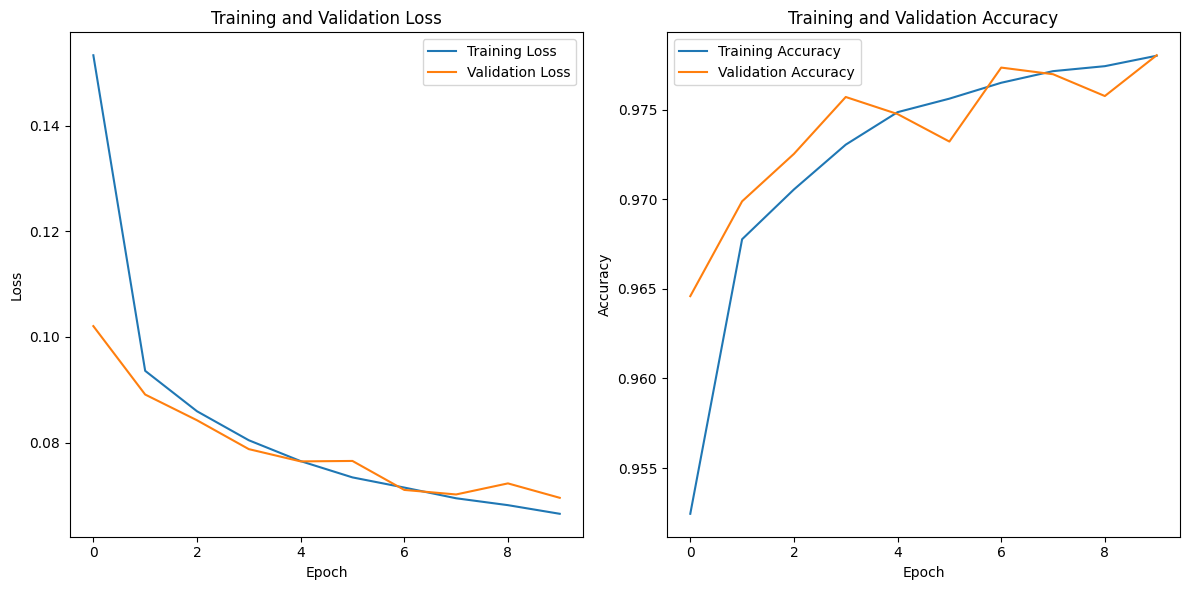

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

985/985 [==============================] - 2s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred,  target_names=multi_label_encoder.classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.98      0.98     11484
       Probe       0.94      0.94      0.94      2947
         R2L       0.84      0.74      0.79       274
         U2R       0.00      0.00      0.00        15
      normal       0.98      0.99      0.98     16774

   micro avg       0.98      0.98      0.98     31494
   macro avg       0.75      0.73      0.74     31494
weighted avg       0.98      0.98      0.98     31494
 samples avg       0.98      0.98      0.98     31494



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

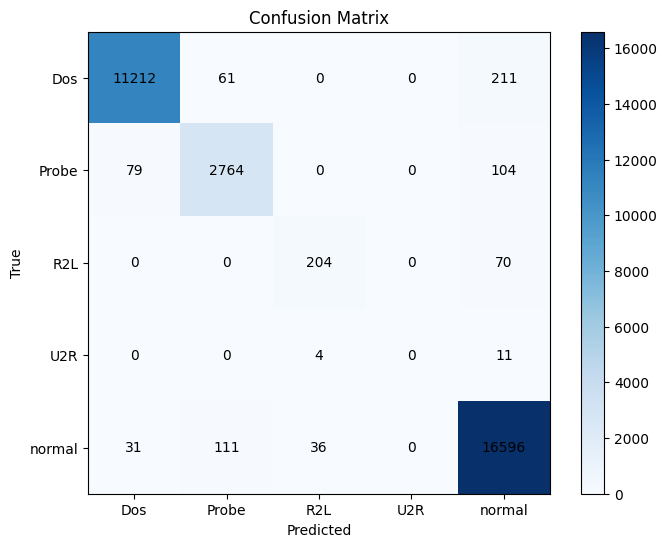

In [ ]:
target_names=multi_label_encoder.classes_
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.savefig('/content/drive/My Drive/cmput_644_project/supervised_learning_plots/confusion_matrix_multi_selected_features{}.jpg'.format(model.__class__.__name__))
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.98
F1 Score: 0.98
Recall: 0.98
Precision: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'multi_selected_features_fnn_model.pkl')

joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/supervised_learning_models/MultiClassification/multi_selected_features_fnn_model.pkl
